## 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행
* Fashion-MNIST 데이터셋을 활용하여 로지스틱 회귀 모델을 구현
* 각 이미지 크기를 28 X 28 / 흑백이미지 / 총 10개의 클래스

In [1]:
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠 
1 - 바지
2 - 스웨터 
3 - 드레스 
4 - 코트 
5 - 샌들 
6 - 셔츠 
7 - 운동화 
8 - 가방
9 - 앵글 부츠 
"""

'\nFashion-MNIST 라벨 구성 요소\n0 - 티셔츠 \n1 - 바지\n2 - 스웨터 \n3 - 드레스 \n4 - 코트 \n5 - 샌들 \n6 - 셔츠 \n7 - 운동화 \n8 - 가방\n9 - 앵글 부츠 \n'

In [2]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 데이터셋 다운로드 및 DataLoader 생성

In [3]:
train_dataset = dsets.FashionMNIST(root ='./data',
                                  train = True, 
                                  transform = transforms.ToTensor(),
                                  download=False)

test_dataset = dsets.FashionMNIST(root='./data',
                                 train=False,
                                 transform = transforms.ToTensor(),
                                 download=False)

### train Loader, test Loader 생성

In [4]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

## 모델 정의

In [5]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
# 하이퍼파라미터 설정
input_size = 28 * 28 # 이미지 크기의 값
num_classes = 10
num_epochs = 10
learning_rate = 0.001

total_step = len(train_loader)

### 모델, 손실함수, 옵티마이저 정의

In [7]:
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [8]:
#setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: ', device)
model.to(device)

Using device:  cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### 모델 학습

Epoch [1/10], Step [100/600], Loss: 2.1164, Train Acc: 0.2900
Epoch [1/10], Step [200/600], Loss: 1.9502, Train Acc: 0.4200
Epoch [1/10], Step [300/600], Loss: 1.7797, Train Acc: 0.4900
Epoch [1/10], Step [400/600], Loss: 1.7257, Train Acc: 0.5075
Epoch [1/10], Step [500/600], Loss: 1.6510, Train Acc: 0.5360
Epoch [1/10], Step [600/600], Loss: 1.6326, Train Acc: 0.5433
Epoch [2/10], Step [100/600], Loss: 1.4585, Train Acc: 0.6600
Epoch [2/10], Step [200/600], Loss: 1.3370, Train Acc: 0.6900
Epoch [2/10], Step [300/600], Loss: 1.4023, Train Acc: 0.6400
Epoch [2/10], Step [400/600], Loss: 1.3391, Train Acc: 0.6375
Epoch [2/10], Step [500/600], Loss: 1.2363, Train Acc: 0.6500
Epoch [2/10], Step [600/600], Loss: 1.3495, Train Acc: 0.6433
Epoch [3/10], Step [100/600], Loss: 1.2022, Train Acc: 0.6600
Epoch [3/10], Step [200/600], Loss: 1.1506, Train Acc: 0.6850
Epoch [3/10], Step [300/600], Loss: 1.1581, Train Acc: 0.6833
Epoch [3/10], Step [400/600], Loss: 1.1299, Train Acc: 0.6800
Epoch [3

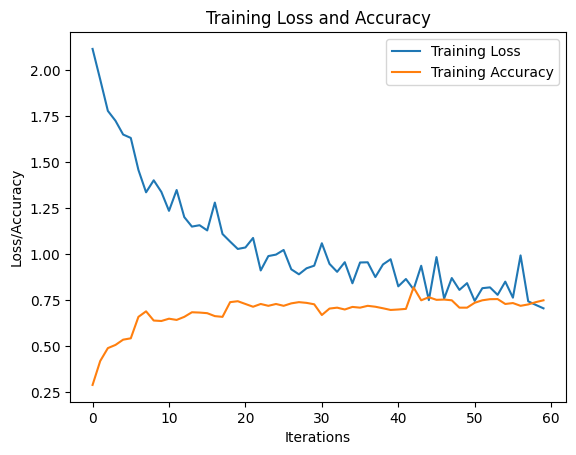

In [9]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    correct = 0 
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        
        # 데이터 로드 
        images = images.reshape(-1, input_size).to(device)
        labels =labels.to(device)

        # 순전파 및 Loss 계산
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 로그 출력
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            print("Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Acc: {:.4f}".format(epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))

            
# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label = 'Training Loss')
plt.plot(acc_list, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()